In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath_processed = 'C:/Users/Dirk/Google Drive/Dirk/TU/Afstuderen/Afstuderen/Thesis/3. Formalisation/Processed CBS data/'
filepath_raw = 'C:/Users/Dirk/Google Drive/Dirk/TU/Afstuderen/Afstuderen/Thesis/3. Formalisation/Raw CBS data/'
filepath_other = 'C:/Users/Dirk/Google Drive/Dirk/TU/Afstuderen/Afstuderen/Thesis/3. Formalisation/Raw data other/'

In [3]:
data =  pd.read_csv(filepath_processed + 'Total_dataset.csv', index_col = 0, 
                    dtype = {'gemeente': str ,'postcode': str ,'huisnummer' : int ,
                             'huisletter': str ,'huisnummertoevoeging': str , 
                             'oppervlakteverblijfsobject' : float ,'pandbouwjaar' : int ,
                             'openbareruimte' : str ,'pandstatus' : str , 'Woningkenmerken': str ,
                             'Energielabel' : str,'leeftijd' : int ,'Age group': str, 
                             'GebruiksOppervlakteklasse' : str,'Bouwjaarklasse' : str,
                             'gasverbruik m3/m2' : float ,'geschat gasverbruik jaarlijks' : float, 
                             'Gemiddelde grootte huishouden' : float , 
                             'elektriciteits verbruik pp' : float , 
                             'geschat elektriciteitsverbruik jaarlijks' : float})


buurten = pd.read_csv(filepath_raw + 'postcode_huisnummer_buurten.csv',delimiter = ';')
wijk = pd.read_csv(filepath_raw + 'wijk2019.csv', delimiter = ';')
buurt = pd.read_csv(filepath_raw + 'buurt2019.csv', delimiter = ';')


C:\Users\Dirk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
wijk_dict = wijk.astype(str).set_index('Wijkcode2019').to_dict()['Wijknaam_2019K_NAAM']
buurt.Buurtcode_2019 = buurt.Buurtcode_2019.astype(str)
buurt_dict = buurt.set_index('Buurtcode_2019').to_dict()['Buurtnaam_2019']

buurten[['Buurt2019']]= buurten[['Buurt2019']].astype(str)
buurten[['Wijk2019']] = buurten[['Wijk2019']].astype(str)
buurten['buurt_naam'] = buurten['Buurt2019'].map(buurt_dict)
buurten['wijk_naam'] = buurten['Wijk2019'].map(wijk_dict)
buurten = buurten.drop(['Buurt2019','Wijk2019','Gemeente2019'], axis = 1).rename(columns = {'PC6':'postcode','Huisnummer':'huisnummer'})

In [5]:
#Hier aanpassing
data = data.merge(buurten, on = ['postcode','huisnummer'], how = 'inner')

In [6]:
investment_cost = pd.read_csv(filepath_other + 'investment cost CE_Delft.csv')
energy_savings = pd.read_csv(filepath_other + 'Energy savings CE_Delft.csv')
investment_cost.Schil = investment_cost.Schil.str.strip('Huidig ')
energy_savings.Schil = energy_savings.Schil.str.strip('Huidig ')
i_dict = investment_cost.set_index(['Schil', 'Woningtype']).to_dict()
e_dict = energy_savings.set_index('Schil').to_dict()

In [7]:
stapel_dict = {'Appartement':'Gestapeld','2-onder-1-kapwoning':'Grondgebonden','Hoekwoning':'Grondgebonden','Tussenwoning':'Grondgebonden','Vrijstaande woning':'Grondgebonden','O':'Grondgebonden','N':'Grondgebonden','C0':'Grondgebonden'}
data['Type'] = data['Woningkenmerken'].map(stapel_dict)
for i in energy_savings.Schil[1:7]:
    for j in ['Grondgebonden','Gestapeld']:

        data['Yearly savings ' + i + ' (m3)'] = data['geschat gasverbruik jaarlijks'] * data['Energielabel'].map(e_dict[i])
        data['Total cost '+ i ] = data['oppervlakteverblijfsobject'] * pd.Series(list(zip(data['Energielabel'],data['Type']))).map(i_dict[i])
        data['Savings / cost ' + i] = data['Yearly savings ' + i + ' (m3)'] / data['Total cost '+ i]

In [8]:
kwb = pd.read_csv(filepath_processed + 'total_kwb.csv').groupby(by = 'gemeente').mean()#.groupby(by = 'gemeente').mean()#.merge(municipalities_HP[['statnaam', 40]], left_index = True, right_on = 'statnaam').set_index('statnaam')

In [9]:
mun_data = data.groupby(by = 'gemeente').mean()

In [10]:
mun_data = mun_data.merge(kwb, left_index = True, right_index = True)

In [11]:
mun_data.columns

Index(['huisnummer', 'oppervlakteverblijfsobject', 'pandbouwjaar',
       'RIJKSMONNR', 'leeftijd', 'gasverbruik m3/m2',
       'geschat gasverbruik jaarlijks', 'Gemiddelde grootte huishouden',
       'elektriciteits verbruik pp',
       'geschat elektriciteitsverbruik jaarlijks', 'Yearly savings F (m3)',
       'Total cost F', 'Savings / cost F', 'Yearly savings E (m3)',
       'Total cost E', 'Savings / cost E', 'Yearly savings D (m3)',
       'Total cost D', 'Savings / cost D', 'Yearly savings C (m3)',
       'Total cost C', 'Savings / cost C', 'Yearly savings B (m3)',
       'Total cost B', 'Savings / cost B', 'Yearly savings A (m3)',
       'Total cost A', 'Savings / cost A', 'total', 'g_woz', 'p_koopw',
       'p_wcorpw', 'p_ov_hw', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'p_hh_li',
       'p_hh_hi', 'p_stadsv', 'Centroid in WKO-contour?',
       'Potentie WKO per buurt (GJ)', 'Potentie bodemlussen per buurt (GJ)',
       'P-WKO', 'P-GHP', 'P-TESW', 'g_ink_pi', 'Aansluitingen',
     

In [12]:
cvs = pd.read_csv(filepath_processed + 'Gamma_HP.csv', header = [0,1,2])

In [13]:
muns = cvs.xs('gemeente', axis = 1, level = 2, drop_level=True).transpose().reset_index(drop=True).transpose()

In [14]:
muns = muns.rename(columns = {0: 'gemeente'})

In [15]:
hp_cost = cvs.xs('mean',axis = 1, level=1, drop_level=True).iloc[:,-4:].transpose().reset_index(drop = True).transpose().merge(muns, left_index = True, right_index = True).groupby(by = 'gemeente').mean().rename(columns = {0: 'A AHP', 1: 'B AHP', 2:'A GHP', 3: 'B GHP'})

In [16]:
hp_thres = cvs.xs('mean',axis = 1, level=1, drop_level=True).iloc[:,:-4].transpose().reset_index(drop = True).transpose().merge(muns, left_index = True, right_index = True).groupby(by = 'gemeente').mean().rename(columns = {0: 'A AHP', 1: 'B AHP', 2:'A GHP', 3: 'B GHP'})

In [17]:
hp_thres

,A AHP,B AHP,A GHP,B GHP
gemeente,,,,
's-Gravenhage,1.054234,1.170355,0.647092,0.716561
's-Hertogenbosch,1.327213,1.461232,0.808947,0.887598
Aa en Hunze,1.848115,2.012472,1.106947,1.201408
Aalsmeer,1.356207,1.486594,0.827399,0.903987
Aalten,1.506514,1.669129,0.915877,1.010578
...,...,...,...,...
Zundert,1.551107,1.708709,0.941605,1.033218
Zutphen,1.201622,1.331525,0.736160,0.813044
Zwartewaterland,1.592906,1.740870,0.961996,1.047761


In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2019_gegeneraliseerd&outputFormat=json'
municipalities  = gpd.read_file(geodata_url)

In [20]:
municipalities.statnaam = municipalities.statnaam.str.replace('â', 'a').str.replace('ú','u').str.replace(',','')

In [21]:
mun_data

,huisnummer,oppervlakteverblijfsobject,pandbouwjaar,RIJKSMONNR,leeftijd,gasverbruik m3/m2,geschat gasverbruik jaarlijks,Gemiddelde grootte huishouden,elektriciteits verbruik pp,geschat elektriciteitsverbruik jaarlijks,...,Potentie bodemlussen per buurt (GJ),P-WKO,P-GHP,P-TESW,g_ink_pi,Aansluitingen,Aansluit_lengte_m,Hoofdleiding_lengte_m,x,y
gemeente,,,,,,,,,,,,,,,,,,,,,
's-Gravenhage,177.932776,102.979916,1956.245000,301451.474033,63.755000,12.893097,1172.831711,1.997780,1232.486726,2449.293520,...,1.167239e+05,49528.866774,19650.644377,1686.160879,30.014019,883.265487,7819.734513,9447.477876,0.253342,0.482068
's-Hertogenbosch,70.799474,117.080028,1972.074928,113603.728972,47.925072,11.865477,1327.103614,2.093561,1379.033932,2881.571224,...,1.599692e+05,45960.773019,26931.062378,2771.240591,27.667857,513.903846,5500.182692,6536.182692,0.521299,0.348981
Aa en Hunze,26.582018,173.194541,1965.557131,444169.625000,54.442869,13.596973,2127.688807,2.226974,1551.015299,3454.592774,...,8.566110e+05,257436.402909,144211.759745,2445.084436,27.338235,297.420000,5149.360000,5852.560000,0.882274,0.829494
Aalsmeer,66.398472,126.047871,1981.282387,404683.583333,38.717613,11.563472,1374.462367,2.395962,1335.378331,3199.878121,...,3.753333e+05,126478.752189,63187.935354,35962.943535,30.966667,1422.555556,21152.444444,17168.222222,0.376213,0.553365
Aalten,31.838675,143.665279,1966.816865,158576.823529,53.183135,12.570778,1731.590073,2.322859,1458.991412,3389.048048,...,4.306034e+05,16991.892581,72492.742947,48.699116,22.996296,471.862069,8155.758621,9517.896552,0.843546,0.426529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zundert,30.168142,158.728995,1977.129932,497372.421053,42.870068,12.259921,1858.005676,2.243123,1545.575419,3471.887909,...,1.678977e+06,456255.563085,282658.367769,2136.809828,26.000000,1152.454545,21381.454545,25518.454545,0.341808,0.264019
Zutphen,71.633211,114.399322,1960.400839,95581.738636,59.599161,12.379298,1350.257578,2.113834,1353.102220,2848.511678,...,1.971194e+05,21049.370088,33185.342053,803.164240,23.293548,601.451613,6092.870968,7189.419355,0.751790,0.505375
Zwartewaterland,31.896110,150.569056,1969.632260,55984.576271,50.367740,11.887779,1681.650758,2.618861,1333.678039,3478.750447,...,3.999971e+05,117185.033333,67340.110909,5570.722789,23.737931,290.088235,3616.941176,4163.088235,0.711006,0.680954


In [22]:
results = pd.DataFrame()
results['Cost insulation to A / Average property value'] = mun_data['Total cost A'] / (mun_data['g_woz'] * 1000)
results['Cost insulation to B / Average property value']  = mun_data['Total cost B'] / (mun_data['g_woz'] * 1000)
results['gasverbruik'] = mun_data['geschat gasverbruik jaarlijks']
results['Cost insulation to A / Average income'] = mun_data['Total cost A'] / (mun_data['g_ink_pi'] * 1000)
results['Cost insulation to B / Average income'] = mun_data['Total cost B'] / (mun_data['g_ink_pi'] * 1000)
results['Cost B AHP / WOZ'] = (mun_data['Total cost B'] + hp_cost['B AHP']) / (mun_data['g_woz'] * 1000)
results['HP thres'] = hp_thres['B AHP']

(342.36549999999806, 291249.12450000003, 291220.88875, 634977.6922500001)

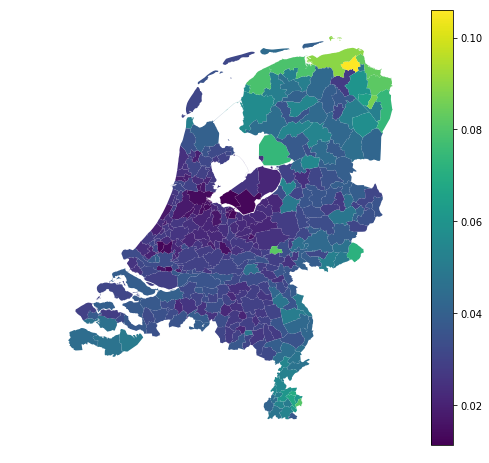

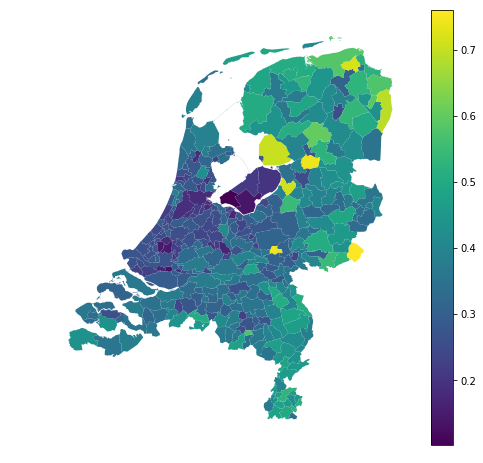

In [23]:
output = municipalities.merge(results, right_index = True, left_on = 'statnaam')
#fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,10))

WOZ = output.plot(column='Cost insulation to B / Average property value', figsize = (8,8),cmap='viridis', legend = True)#, ax = ax1)
WOZ.axis('off')#
#WOZ.set_title('Insulation cost label B:\n Average share of property value')
ink = output.plot(column='Cost insulation to B / Average income', figsize = (8,8),cmap='viridis', legend = True)#, ax = ax2)
ink.axis('off')#
#ink.set_title('Insulation cost label B:\nAverage share of income ')

(342.36549999999806, 291249.12450000003, 291220.88875, 634977.6922500001)

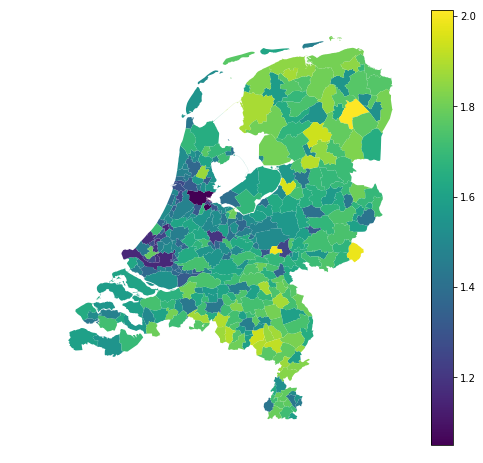

In [24]:
WOZ = output.plot(column='HP thres', figsize = (8,8),cmap='viridis', legend = True)
WOZ.axis('off')#

In [25]:
output

,id,statcode,jrstatcode,statnaam,rubriek,geometry,Cost insulation to A / Average property value,Cost insulation to B / Average property value,gasverbruik,Cost insulation to A / Average income,Cost insulation to B / Average income,Cost B AHP / WOZ,HP thres
0,cbs_gemeente_2019_gegeneraliseerd.1,GM0003,2019GM0003,Appingedam,gemeente,"MULTIPOLYGON (((254777.541 596451.767, 254792....",0.083460,0.047948,1453.534011,0.624167,0.358583,0.094446,1.690842
1,cbs_gemeente_2019_gegeneraliseerd.2,GM0010,2019GM0010,Delfzijl,gemeente,"MULTIPOLYGON (((253004.946 603887.823, 253797....",0.141891,0.083260,1740.299542,0.890547,0.522565,0.146185,1.760183
2,cbs_gemeente_2019_gegeneraliseerd.3,GM0014,2019GM0014,Groningen,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",0.047304,0.027922,1244.319463,0.520561,0.307274,0.059902,1.551004
3,cbs_gemeente_2019_gegeneraliseerd.4,GM0024,2019GM0024,Loppersum,gemeente,"MULTIPOLYGON (((247882.785 603505.649, 247888....",0.151049,0.105912,2120.863498,1.026613,0.719837,0.161452,1.847431
4,cbs_gemeente_2019_gegeneraliseerd.5,GM0034,2019GM0034,Almere,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422....",0.042065,0.011327,1129.011745,0.377371,0.101617,0.043196,1.397221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,cbs_gemeente_2019_gegeneraliseerd.351,GM1963,2019GM1963,Hoeksche Waard,gemeente,"MULTIPOLYGON (((97460.999 412337.999, 96725.94...",0.057266,0.028886,1426.500862,0.582057,0.293596,0.057474,1.538736
351,cbs_gemeente_2019_gegeneraliseerd.352,GM1966,2019GM1966,Het Hogeland,gemeente,"MULTIPOLYGON (((215071.742 595253.084, 215169....",0.137371,0.089435,2068.408115,0.894469,0.582337,0.142085,1.812395
352,cbs_gemeente_2019_gegeneraliseerd.353,GM1969,2019GM1969,Westerkwartier,gemeente,"MULTIPOLYGON (((217623.770 592502.490, 217917....",0.073245,0.043405,1908.946302,0.756218,0.448136,0.074743,1.805286
353,cbs_gemeente_2019_gegeneraliseerd.355,GM1978,2019GM1978,Molenlanden,gemeente,"MULTIPOLYGON (((123532.177 440293.183, 123576....",0.053085,0.029507,1621.865334,0.677359,0.376510,0.053492,1.726760


In [26]:
import seaborn as sns

C:\Users\Dirk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


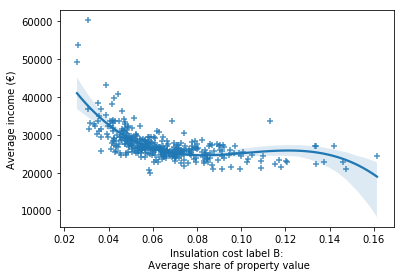

In [27]:
y = mun_data['g_ink_pi'] * 1000

x = results['Cost insulation to B / Average property value']
x = results['Cost B AHP / WOZ']
fig = sns.regplot(x=x, y=y,marker="+",order =3)
fig.set_ylabel('Average income (€)')
fig.set_xlabel('Insulation cost label B:\n Average share of property value')
plt.show()

In [28]:
kwb_n = pd.read_csv(filepath_processed + 'total_kwb.csv').set_index(['gemeente', 'buurt_naam'])

In [29]:
kwb_n

total  g_woz  p_koopw  p_wcorpw  p_ov_hw  \
gemeente      buurt_naam                                                       
's-Gravenhage Archipelbuurt        3782.0  506.0     52.0      14.0     33.0   
              Arendsdorp           1172.0  647.0     41.0      24.0     35.0   
              Belgisch Park        4197.0  370.0     60.0      13.0     25.0   
              Bezuidenhout-Midden  2386.0  323.0     54.0       3.0     34.0   
              Bezuidenhout-Oost    5276.0  244.0     55.0       7.0     37.0   
...                                   ...    ...      ...       ...      ...   
Zwolle        Wezenlanden           516.0  195.0     29.0      63.0      7.0   
              Wijthmen              249.0  342.0     87.0       4.0      9.0   
              Windesheim            158.0  281.0     78.0      19.0      1.0   
              Wipstrik-Noord       1304.0  320.0     80.0       5.0     15.0   
              Wipstrik-Zuid        1859.0  209.0     37.0      53.0     10.0   

                                   a_opp_ha  a_lan_ha  a_wat_ha  p_hh_li  \
gemeente      buurt_naam                                                   
's-Gravenhage Archipelbuurt            87.0      87.0       0.0     35.7   
              Arendsdorp               55.0      51.0       4.0     22.8   
              Belgisch Park           106.0     106.0       0.0     40.6   
              Bezuidenhout-Midden      62.0      62.0       0.0     33.5   
              Bezuidenhout-Oost        77.0      77.0       0.0     37.0   
...                                     ...       ...       ...      ...   
Zwolle        Wezenlanden              57.0      50.0       7.0     66.5   
              Wijthmen                734.0     694.0      40.0     26.2   
              Windesheim               53.0      53.0       0.0     20.6   
              Wipstrik-Noord           59.0      58.0       1.0     22.6   
              Wipstrik-Zuid            58.0      53.0       4.0     54.4   

                                   p_hh_hi  ...  \
gemeente      buurt_naam                    ...   
's-Gravenhage Archipelbuurt           32.8  ...   
              Arendsdorp              53.8  ...   
              Belgisch Park           26.6  ...   
              Bezuidenhout-Midden     28.9  ...   
              Bezuidenhout-Oost       19.7  ...   
...                                    ...  ...   
Zwolle        Wezenlanden              9.5  ...   
              Wijthmen                31.1  ...   
              Windesheim              30.3  ...   
              Wipstrik-Noord          35.2  ...   
              Wipstrik-Zuid           12.6  ...   

                                   Potentie bodemlussen per buurt (GJ)  \
gemeente      buurt_naam                                                 
's-Gravenhage Archipelbuurt                                   139200.0   
              Arendsdorp                                       81600.0   
              Belgisch Park                                   164300.0   
              Bezuidenhout-Midden                              99200.0   
              Bezuidenhout-Oost                               127050.0   
...                                                                ...   
Zwolle        Wezenlanden                                      80000.0   
              Wijthmen                                       1075700.0   
              Windesheim                                       82150.0   
              Wipstrik-Noord                                   92800.0   
              Wipstrik-Zuid                                    84800.0   

                                           P-WKO          P-GHP       P-TESW  \
gemeente      buurt_naam                                                       
's-Gravenhage Archipelbuurt         58586.327273   23434.530909     0.000000   
              Arendsdorp            34343.709091   13737.483636  2497.724298   
              Belgisch Park         71381.042424   27660.15

In [30]:
cvs

Unnamed: 0_level_0   Unnamed: 1_level_0 threshold A-HP at A  \
      Unnamed: 0_level_1   Unnamed: 1_level_1                mean   
                gemeente           buurt_naam  Unnamed: 2_level_2   
0          's-Gravenhage        Archipelbuurt            1.107104   
1          's-Gravenhage           Arendsdorp            1.088039   
2          's-Gravenhage        Belgisch Park            1.065936   
3          's-Gravenhage  Bezuidenhout-Midden            1.031119   
4          's-Gravenhage    Bezuidenhout-Oost            0.916227   
...                  ...                  ...                 ...   
13206             Zwolle          Wezenlanden            1.085315   
13207             Zwolle             Wijthmen            1.527729   
13208             Zwolle           Windesheim            1.431396   
13209             Zwolle       Wipstrik-Noord            1.238185   
13210             Zwolle        Wipstrik-Zuid            1.037937   

                                            threshold A-HP at B  \
                   alpha              theta                mean   
      Unnamed: 3_level_2 Unnamed: 4_level_2  Unnamed: 5_level_2   
0               6.756954           0.163847            1.233549   
1               4.910011           0.221596            1.175552   
2              10.147609           0.105043            1.204908   
3               9.374073           0.109997            1.148057   
4              23.432142           0.039101            1.055384   
...                  ...                ...                 ...   
13206          13.349799           0.081298            1.163124   
13207          13.178688           0.115924            1.657358   
13208          16.766818           0.085371            1.567557   
13209          17.258914           0.071742            1.352580   
13210          15.978550           0.064958            1.132240   

                                            threshold G-HP at A  \
                   alpha              theta                mean   
      Unnamed: 6_level_2 Unnamed: 7_level_2  Unnamed: 8_level_2   
0               8.627997           0.142970            0.678934   
1               5.655094           0.207875            0.666637   
2              12.846189           0.093795            0.655299   
3              11.781011           0.097450            0.634364   
4              29.835181           0.035374            0.566315   
...                  ...                ...                 ...   
13206          18.935581           0.061425            0.667271   
13207          14.201268           0.116705            0.928169   
13208          18.394503           0.085219            0.872358   
13209          18.182852           0.074388            0.758505   
13210          21.861952           0.051790            0.639164   

                          ... investment cost A-HP at A  \
                   alpha  ...                     theta   
      Unnamed: 9_level_2  ...       Unnamed: 16_level_2   
0               7.280612  ...                117.338392   
1               5.310624  ...               4612.263564   
2              10.882835  ...                 67.144009   
3               9.910230  ...                 51.649357   
4              25.006150  ...                 16.764974   
...                  ...  ...                       ...   
13206          14.255415  ...                 42.633866   
13207          14.642624  ...                212.536674   
13208          18.286530  ...                 91.278735   
13209          18.486533  ...                 51.926507   
13210          17.155884  ...                 36.401625   

      investment cost A-HP at B                                          \
                           mean               alpha               theta   
            Unnamed: 17_level_2 Unnamed: 18_level_2 Unnamed: 19_level_2   
0                   7142.129499           55.860764          127.855922   
1                   7298.105490   

In [31]:
cvs.xs('mean',axis = 1, level=1, drop_level=True).iloc[:,:-4].transpose().reset_index(drop = True).transpose()

,0,1,2,3
0,1.107104,1.233549,0.678934,0.754459
1,1.088039,1.175552,0.666637,0.718919
2,1.065936,1.204908,0.655299,0.738348
3,1.031119,1.148057,0.634364,0.704441
4,0.916227,1.055384,0.566315,0.650089
...,...,...,...,...
13206,1.085315,1.163124,0.667271,0.714054
13207,1.527729,1.657358,0.928169,1.003666
13208,1.431396,1.567557,0.872358,0.952104
13209,1.238185,1.352580,0.758505,0.826157


In [32]:
hp_thres_neigh = cvs.xs('mean',axis = 1, level=1, drop_level=True).iloc[:,:-4].transpose().reset_index(drop = True).transpose().merge(kwb_n.reset_index(), left_index = True, right_index = True).rename(columns = {0: 'A AHP', 1: 'B AHP', 2:'A GHP', 3: 'B GHP', 'huisnummer': 'n houses'})

In [33]:
hp_thres_neigh = hp_thres_neigh.set_index(['gemeente','buurt_naam'])

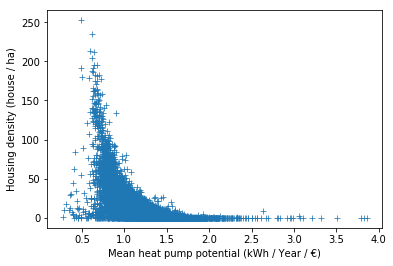

In [34]:
x = hp_thres_neigh.iloc[:,:4].mean(axis = 1)
y = kwb_n['total']/ kwb_n['a_lan_ha']
fig = sns.scatterplot(x=x, y=y,marker="+")#, order = 2)
fig.set_xlabel('Mean heat pump potential (kWh / Year / €)')
fig.set_ylabel('Housing density (house / ha)')

plt.show()

In [35]:
data['']

KeyError: ''